## Ensemble Methods : 

Bir çok base model kullanarak ortaya bir meta model yani en iyi modeli çıkarmaktır. örneğin bir çok ağaç oluşturacağız veya bir çok logistic regression oluşturacağız ve bunların sonuçlarını bir araya getirip bir sonuç bulacağız. 

Toplam gözlem sayısının her seferinde 2/3 ünü rastgele alıp ağaca atıyor ve ağaç üzerinden eğitim yapmaktadır. futureleri class sayısına göre rastgele seçiyor ve seçtiği futureler içerisinden en iyi futureleri seçiyor. rastgele seçtiği için her ağaçta değerler değişiyor. rastgele aldığı için bizi overfitingten kurtarmaktadır. 

Decision tree den farklı olarak datanın 2/3 ünü rastgele seçiyor. Tam bir bagging diyemeyiz. Rassallığı farklı ağaçlara bölüyor. 2/3 ünü rastgele seçtiği için bazı ağaçlar çok iyi, bazı ağaçlar çok kötü tahmin yapacak. bunları teker teker bakar ve en iyilerini en güzel tahmin yapılan futureleri ağırlıklandırır. Decision Tree de ise en iyi futureye göre ağaçlandırma yapar. rastgele yapmaz. Random forest için her ağacın demokratik oy hakkı var. en iyi predicte göre sonuç verir.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100,18.700,181.000,3750.000,MALE
1,Adelie,Torgersen,39.500,17.400,186.000,3800.000,FEMALE
2,Adelie,Torgersen,40.300,18.000,195.000,3250.000,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.700,19.300,193.000,3450.000,FEMALE


In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.loc[336, "sex"] = "MALE"

### OrdinalEncoder :

#### Uyarı !!! : 

Bu sadece tree basic modeller için geçerlidir. ama diğer tüm modellerde dummy kullanılması gerekmektedir. dummy ile sutun sayımız artacağı için tree base modellerde hata sayısı artacaktır. Diğer tüm modellede dummy ile yapılır ama tree base modellerde ordinalencoder kullanılır.  eğer tree base modellerde 5 tane categoric veri olan futureyi dummy yaparsak bu sefer o futurenin targete olan etkisini oldukça indirgemiş oluruz. tree base için feature_importance yi yanlış alırız. 

In [9]:
from sklearn.preprocessing import OrdinalEncoder

### Train | Test Split :

In [10]:
X = df.drop('species',axis=1)
y = df['species']

In [11]:
cat = X.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [12]:
X[cat]

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
4,Torgersen,FEMALE
5,Torgersen,MALE
...,...,...
338,Biscoe,FEMALE
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


In [13]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.000,39.100,18.700,181.000,3750.000,1.000
1,2.000,39.500,17.400,186.000,3800.000,0.000
2,2.000,40.300,18.000,195.000,3250.000,0.000
4,2.000,36.700,19.300,193.000,3450.000,0.000
5,2.000,39.300,20.600,190.000,3650.000,1.000


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Default Value :

In [16]:
from sklearn.ensemble import RandomForestClassifier
# target categoric olduğu için classifier kullanılacak.

rnd_model = RandomForestClassifier(random_state = 101)
rnd_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

### Metrics : 

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [18]:
eval_metric(rnd_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



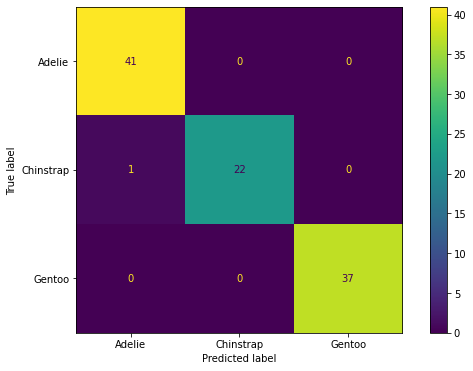

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rnd_model, X_test, y_test);

### Cross Validate Controll : 

In [28]:
from sklearn.model_selection import cross_val_score, cross_validate

model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.996
test_precision_micro   0.996
test_recall_micro      0.996
test_f1_micro          0.996
dtype: float64

In [21]:
rnd_model.feature_importances_

array([0.10574241, 0.36403997, 0.14228711, 0.22892491, 0.15259864,
       0.00640695])

In [23]:
df_f_i = pd.DataFrame(index=X.columns, data = rnd_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
sex,0.006
island,0.106
culmen_depth_mm,0.142
body_mass_g,0.153
flipper_length_mm,0.229
culmen_length_mm,0.364


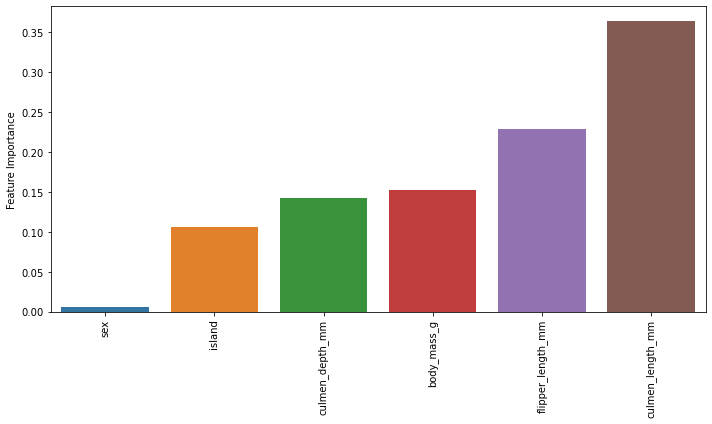

In [25]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

### Random Forest Hyper Parametres : 

#### 1-) n_estimators : 
Default değeri 100 dür. en önemli parametresidir. ağaç sayımızın ne kadar olacağını belirler. 64 ve 128 sayıları da tavsiye edilir. 

#### 2-) criterion : 
classification için aynıdır. gini ve estimatour değerleri vardır. gini ve estimatour değerlerini 0 ra yakınlaştırmak esastır.

#### 3-) max_depth : 
Ağacın ne kadar dallanacağını belirlemektedir. 

#### 4-) min_samples_split : 
Bir yaprağın bölünme şartıdır. Yaprağın içine alacağı gözlem sayılarını belirler. eğer min_sample splite verdiğimiz değeri ayarlayamassak yaprak bölünemez. dallanmayı kontrol etmeye yardım eder.

#### 5-)  min samples leaf :
Bir yaprağın yaprak olarak kabul edilebilmesi için o yaprakta bulunması gereken gözlem sayısıdır.

#### 6-) max_leaf_nodes :
En sonda kalan yaprak sayısını ayarlamaktadır.

#### 7-) splitter :
Default best, diğeri randomdur. best en güzel soru ile datayı ayır demektir, random ise rastgele soru sorar. ve sonunda en kuvvetli futureyi seçer. best, targeti tahminde en yüksek katsayıya sahip futureyi seçerek ilk yaprağı başlatır.

#### 8-) max_features : 
Burda decision tree den farklı bir durum vardır. Decision tree de tüm futurelerden en iyisi hangisi ise her dallanmada en iyi olan futureyi kullanmaktayd. bu da overfitinge neden olmaktaydı. Random Forest ta ise auto değeri tüm futureler sayısının karekökünü alır. sqrt ile aynıdır. log 2 ise future sayısının 2 tabanında logaritmasını alır.

#### 9-) bootstrap : 

default değeri True dir. n_estimators sayısı kadar ağaç oluşturulur, ve her bir ağaç için prediction yaptırır, alınan prediction sonuçlarını sayar ve sonucunda en fazla hangi class prediction edilmişse o classı tahmin değeri olarak atar. oylama usulu yapar. yani en fazla bulunan classı alır. 

data da ne kadar gözlem varsa her bir ağaca 2/3 ünü ayırır. rastgele ayırır. onların içinden max_feature sayısına göre yeniden oluşturur.


### GridSearchCV Best Params : 

In [37]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state= 101 )

param_grid = {"n_estimators" : [None, 64, 128],
              "criterion" : ["gini", "estimator"],
              "max_features" : ["auto", "log2"],
              "max_depth": [None, 2, 3, 4, 5,6, 7],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]
              
             }

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='recall_micro',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'estimator'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'n_estimators': [None, 64, 128]},
             scoring='recall_micro')

In [38]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [39]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

